In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers.legacy import Adam, Adamax, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
import seaborn as sns

In [ ]:
# mounting google drive to Colab Runtime environment
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#load data
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/DataPBL/PBL4/test_jan.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/DataPBL/PBL4/train.csv')
predict_jan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/DataPBL/PBL4/predict_jan.csv')

In [ ]:
Combine = pd.DataFrame(data={'Test':predict_jan['nat_demand'],'Train nat':train['nat_demand']})
Combine

,Test,Train nat
0,1032.2630,970.3450
1,1017.5806,912.1755
2,1000.2797,900.2688
3,987.2383,889.9538
4,970.3667,893.6865
...,...,...
43770,NaN,1301.6065
43771,NaN,1250.9634
43772,NaN,1193.6802
43773,NaN,1130.4575


<Axes: ylabel='Test'>

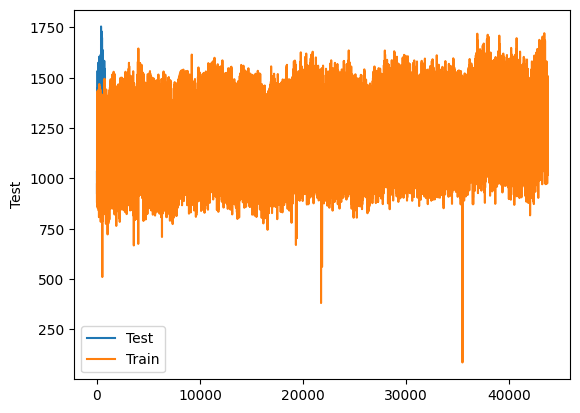

In [ ]:

sns.lineplot(Combine['Test'], label='Test')
sns.lineplot(Combine['Train nat'], label='Train')

# Preprocessing

Mengecek missing value

In [ ]:
test.isnull().sum()

datetime        0
nat_demand      0
T2M_toc         0
QV2M_toc        0
TQL_toc         0
W2M_toc         0
T2M_san         0
QV2M_san        0
TQL_san         0
W2M_san         0
T2M_dav         0
QV2M_dav        0
TQL_dav         0
W2M_dav         0
Holiday_ID      0
holiday         0
school          0
week_day        0
date            0
month           0
hour            0
T2M_toc_s       0
QV2M_toc_s      0
TQL_toc_s       0
W2M_toc_s       0
QV2M_san_s      0
TQL_san_s       0
W2M_san_s       0
T2M_dav_s       0
QV2M_dav_s      0
TQL_dav_s       0
W2M_dav_s       0
Holiday_ID_s    0
holiday_s       0
school_s        0
T2M_toc_s1      0
QV2M_toc_s1     0
TQL_toc_s1      0
W2M_toc_s1      0
QV2M_san_s1     0
TQL_san_s1      0
W2M_san_s1      0
T2M_dav_s1      0
QV2M_dav_s1     0
TQL_dav_s1      0
W2M_dav_s1      0
nat_demand3     0
nat_demand4     0
nat_demand5     0
nat_demand6     0
nat_demand7     0
nat_demand8     0
nat_demand9     0
nat_demand10    0
nat_demand11    0
nat_demand

In [ ]:
train.isnull().sum()

datetime        0
nat_demand      0
T2M_toc         0
QV2M_toc        0
TQL_toc         0
W2M_toc         0
T2M_san         0
QV2M_san        0
TQL_san         0
W2M_san         0
T2M_dav         0
QV2M_dav        0
TQL_dav         0
W2M_dav         0
Holiday_ID      0
holiday         0
school          0
week_day        0
date            0
month           0
hour            0
T2M_toc_s       0
QV2M_toc_s      0
TQL_toc_s       0
W2M_toc_s       0
QV2M_san_s      0
TQL_san_s       0
W2M_san_s       0
T2M_dav_s       0
QV2M_dav_s      0
TQL_dav_s       0
W2M_dav_s       0
Holiday_ID_s    0
holiday_s       0
school_s        0
T2M_toc_s1      0
QV2M_toc_s1     0
TQL_toc_s1      0
W2M_toc_s1      0
QV2M_san_s1     0
TQL_san_s1      0
W2M_san_s1      0
T2M_dav_s1      0
QV2M_dav_s1     0
TQL_dav_s1      0
W2M_dav_s1      0
nat_demand3     0
nat_demand4     0
nat_demand5     0
nat_demand6     0
nat_demand7     0
nat_demand8     0
nat_demand9     0
nat_demand10    0
nat_demand11    0
nat_demand

In [ ]:
predict_jan.isnull().sum()

datetime      0
nat_demand    0
dtype: int64

mengecek tipe data

In [ ]:
train.dtypes

datetime        datetime64[ns]
nat_demand             float64
T2M_toc                float64
QV2M_toc               float64
TQL_toc                float64
W2M_toc                float64
T2M_san                float64
QV2M_san               float64
TQL_san                float64
W2M_san                float64
T2M_dav                float64
QV2M_dav               float64
TQL_dav                float64
W2M_dav                float64
Holiday_ID               int64
holiday                  int64
school                   int64
week_day                 int64
date                     int64
month                    int64
hour                     int64
T2M_toc_s              float64
QV2M_toc_s             float64
TQL_toc_s              float64
W2M_toc_s              float64
QV2M_san_s             float64
TQL_san_s              float64
W2M_san_s              float64
T2M_dav_s              float64
QV2M_dav_s             float64
TQL_dav_s              float64
W2M_dav_s              float64
Holiday_

In [ ]:
test.dtypes

datetime        datetime64[ns]
nat_demand               int64
T2M_toc                float64
QV2M_toc               float64
TQL_toc                float64
W2M_toc                float64
T2M_san                float64
QV2M_san               float64
TQL_san                float64
W2M_san                float64
T2M_dav                float64
QV2M_dav               float64
TQL_dav                float64
W2M_dav                float64
Holiday_ID               int64
holiday                  int64
school                   int64
week_day                 int64
date                     int64
month                    int64
hour                     int64
T2M_toc_s              float64
QV2M_toc_s             float64
TQL_toc_s              float64
W2M_toc_s              float64
QV2M_san_s             float64
TQL_san_s              float64
W2M_san_s              float64
T2M_dav_s              float64
QV2M_dav_s             float64
TQL_dav_s              float64
W2M_dav_s              float64
Holiday_

In [ ]:
train['datetime']= pd.to_datetime(train['datetime'])

In [ ]:
train.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,nat_demand6,nat_demand7,nat_demand8,nat_demand9,nat_demand10,nat_demand11,nat_demand12,nat_demand13,nat_demand14,nat_demand_n
0,2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,970.3450
1,2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,912.1755
2,2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.2688
3,2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.9538
4,2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,893.6865


In [ ]:
train['week_day']=train['datetime'].dt.dayofweek
train['date']=train['datetime'].dt.day
train['month']=train['datetime'].dt.month
train['hour']=train['datetime'].dt.hour
train.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,nat_demand6,nat_demand7,nat_demand8,nat_demand9,nat_demand10,nat_demand11,nat_demand12,nat_demand13,nat_demand14,nat_demand_n
0,2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,970.3450
1,2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,912.1755
2,2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.2688
3,2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.9538
4,2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,893.6865


In [ ]:
def add_features(train):
    train['T2M_toc_s']=train['T2M_toc'].shift(-1).fillna(0)
    train['QV2M_toc_s']=train['QV2M_toc'].shift(-1).fillna(0)
    train['TQL_toc_s']=train['TQL_toc'].shift(-1).fillna(0)
    train['W2M_toc_s']=train['W2M_toc'].shift(-1).fillna(0)
    train['T2M_toc_s']=train['T2M_san'].shift(-1).fillna(0)
    train['QV2M_san_s']=train['QV2M_san'].shift(-1).fillna(0)
    train['TQL_san_s']=train['TQL_san'].shift(-1).fillna(0)
    train['W2M_san_s']=train['W2M_san'].shift(-1).fillna(0)
    train['T2M_dav_s']=train['T2M_dav'].shift(-1).fillna(0)
    train['QV2M_dav_s']=train['QV2M_dav'].shift(-1).fillna(0)
    train['TQL_dav_s']=train['TQL_dav'].shift(-1).fillna(0)
    train['W2M_dav_s']=train['W2M_dav'].shift(-1).fillna(0)
    train['Holiday_ID_s']=train['Holiday_ID'].shift(-1).fillna(0)
    train['holiday_s']=train['holiday'].shift(-1).fillna(0)
    train['school_s']=train['school'].shift(-1).fillna(0)

    train['T2M_toc_s1']=train['T2M_toc'].shift(-2).fillna(0)
    train['QV2M_toc_s1']=train['QV2M_toc'].shift(-2).fillna(0)
    train['TQL_toc_s1']=train['TQL_toc'].shift(-2).fillna(0)
    train['W2M_toc_s1']=train['W2M_toc'].shift(-2).fillna(0)
    train['T2M_toc_s1']=train['T2M_san'].shift(-2).fillna(0)
    train['QV2M_san_s1']=train['QV2M_san'].shift(-2).fillna(0)
    train['TQL_san_s1']=train['TQL_san'].shift(-2).fillna(0)
    train['W2M_san_s1']=train['W2M_san'].shift(-2).fillna(0)
    train['T2M_dav_s1']=train['T2M_dav'].shift(-2).fillna(0)
    train['QV2M_dav_s1']=train['QV2M_dav'].shift(-2).fillna(0)
    train['TQL_dav_s1']=train['TQL_dav'].shift(-2).fillna(0)
    train['W2M_dav_s1']=train['W2M_dav'].shift(-2).fillna(0)

    train['nat_demand3']=train['nat_demand'].shift(3).fillna(0)
    train['nat_demand4']=train['nat_demand'].shift(4).fillna(0)
    train['nat_demand5']=train['nat_demand'].shift(5).fillna(0)
    train['nat_demand6']=train['nat_demand'].shift(6).fillna(0)
    train['nat_demand7']=train['nat_demand'].shift(7).fillna(0)
    train['nat_demand8']=train['nat_demand'].shift(8).fillna(0)
    train['nat_demand9']=train['nat_demand'].shift(9).fillna(0)
    train['nat_demand10']=train['nat_demand'].shift(10).fillna(0)
    train['nat_demand11']=train['nat_demand'].shift(11).fillna(0)
    train['nat_demand12']=train['nat_demand'].shift(12).fillna(0)
    train['nat_demand13']=train['nat_demand'].shift(13).fillna(0)
    train['nat_demand14']=train['nat_demand'].shift(14).fillna(0)
    train['nat_demand_n']=train['nat_demand']
    #train = pd.get_dummies(train)
    return train

In [ ]:
train_ft = add_features(train)

In [ ]:
label=['datetime','nat_demand']
train_ft = train_ft.drop(columns=label)
train_ft = train_ft.astype(float)
train_ft.head()

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,...,nat_demand6,nat_demand7,nat_demand8,nat_demand9,nat_demand10,nat_demand11,nat_demand12,nat_demand13,nat_demand14,nat_demand_n
0,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,970.3450
1,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,912.1755
2,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.2688
3,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.9538
4,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,893.6865


In [ ]:
test['datetime']=pd.to_datetime(test['datetime'])
test['week_day']=test['datetime'].dt.dayofweek
test['date']=test['datetime'].dt.day
test['month']=test['datetime'].dt.month
test['hour']=test['datetime'].dt.hour
test = add_features(test)
test_ft=test.drop(columns=label)
test_ft.astype(float)

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,...,nat_demand6,nat_demand7,nat_demand8,nat_demand9,nat_demand10,nat_demand11,nat_demand12,nat_demand13,nat_demand14,nat_demand_n
0,25.809259,0.018042,0.032806,14.849625,23.301447,0.017035,0.021866,4.559083,22.598322,0.016195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.650842,0.018065,0.053177,15.933757,23.041467,0.016936,0.023796,4.846412,22.471155,0.016104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.501489,0.018119,0.069000,16.806818,22.806177,0.016822,0.024910,5.204608,22.368677,0.016013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.430994,0.018142,0.080017,17.460632,22.657556,0.016746,0.025208,5.628076,22.282556,0.015937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.360132,0.018204,0.084137,16.632112,22.539819,0.016647,0.022789,5.729821,22.203882,0.015862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,26.784631,0.017690,0.010593,19.426609,25.604944,0.017454,0.061157,6.729619,23.565881,0.015554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
740,26.414575,0.017881,0.008904,17.925048,24.805200,0.017110,0.051682,7.381728,22.813013,0.015466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
741,26.165247,0.017990,0.008423,16.726263,24.149622,0.016761,0.041794,7.395275,22.219934,0.015453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,25.979059,0.017997,0.010746,16.620787,23.643121,0.016563,0.038513,6.962887,21.807184,0.015407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predict_jan_ft= predict_jan.drop(columns='datetime')
predict_jan_ft.astype(float)

,nat_demand
0,1032.2630
1,1017.5806
2,1000.2797
3,987.2383
4,970.3667
...,...
739,1376.9838
740,1348.6508
741,1307.8774
742,1250.3269


Scalling

In [ ]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_ft)
test_scaled=scaler.transform(test_ft)
predict_scaled = scaler.fit_transform(predict_jan_ft)

Menyiapkan data-data untuk latih uji dan prediksi

In [ ]:
Xtrain = []
Ytrain = []
Ytrain = train_ft['nat_demand_n'].to_numpy().reshape(-1,1)
Xtrain = train_ft.to_numpy().reshape(-1,57,1)

In [ ]:
Xtest = []
Ytest = []
Ytest = test_ft['nat_demand_n'].to_numpy().reshape(-1,1)
Xtest = test_ft.to_numpy().reshape(-1,57,1)

In [ ]:
pred = []
pred = predict_jan_ft['nat_demand'].to_numpy().reshape(-1,1)

In [ ]:
n_future = 1
n_past = 48

In [ ]:
Xtrain = []
Ytrain = []
for i in range(n_past, len(train_scaled) - n_future +1):
   Xtrain.append(train_scaled[i - n_past:i, 0:train_ft.shape[1]])
   Ytrain.append(train_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
Xtest = []
Ytest = []
for i in range(n_past, len(test_scaled) - n_future +1):
   Xtest.append(test_scaled[i - n_past:i, 0:train_ft.shape[1]])
   Ytest.append(test_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
predict=[]
for i in range(n_past, len(predict_scaled) - n_future +1):
   predict.append(predict_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)
print(Xtrain.shape)
print(Ytrain.shape)

(43727, 48, 57)
(43727, 1)


In [ ]:
Xtest, Ytest = np.array(Xtest), np.array(Ytest)
print(Xtest.shape)
print(Ytest.shape)

(696, 48, 57)
(696, 1)


In [ ]:
predict=np.array(predict)
print(predict.shape)

(696, 1)


In [ ]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=2000)
Xtrain

array([[[0.241, 0.613, 0.031, ..., 0.   , 0.   , 0.541],
        [0.244, 0.62 , 0.031, ..., 0.   , 0.   , 0.505],
        [0.247, 0.631, 0.03 , ..., 0.   , 0.   , 0.498],
        ...,
        [0.231, 0.568, 0.011, ..., 0.563, 0.53 , 0.603],
        [0.229, 0.581, 0.025, ..., 0.592, 0.563, 0.567],
        [0.227, 0.592, 0.036, ..., 0.616, 0.592, 0.534]],

       [[0.244, 0.62 , 0.031, ..., 0.   , 0.   , 0.505],
        [0.247, 0.631, 0.03 , ..., 0.   , 0.   , 0.498],
        [0.249, 0.643, 0.031, ..., 0.   , 0.   , 0.492],
        ...,
        [0.229, 0.581, 0.025, ..., 0.592, 0.563, 0.567],
        [0.227, 0.592, 0.036, ..., 0.616, 0.592, 0.534],
        [0.226, 0.599, 0.035, ..., 0.621, 0.616, 0.515]],

       [[0.247, 0.631, 0.03 , ..., 0.   , 0.   , 0.498],
        [0.249, 0.643, 0.031, ..., 0.   , 0.   , 0.492],
        [0.25 , 0.651, 0.033, ..., 0.   , 0.   , 0.494],
        ...,
        [0.227, 0.592, 0.036, ..., 0.616, 0.592, 0.534],
        [0.226, 0.599, 0.035, ..., 0.621, 0.6

In [ ]:
len(test)

744

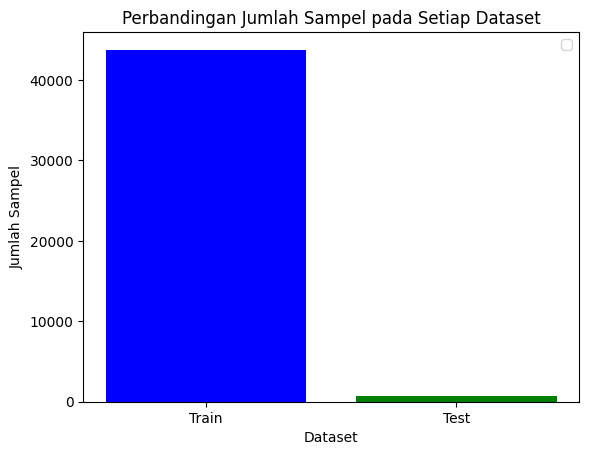

In [ ]:
import matplotlib.pyplot as plt

# Ambil data jumlah sampel untuk setiap dataset
total_train_samples = len(train)
total_test_samples = len(test)

# Plotting bar chart
labels = ['Train', 'Test']
sizes = [total_train_samples, total_test_samples]

plt.bar(labels, sizes, color=['blue', 'green'])
plt.title('Perbandingan Jumlah Sampel pada Setiap Dataset')
plt.xlabel('Dataset')
plt.ylabel('Jumlah Sampel')
plt.legend()

# BUILD LSTM MODEL


MODEL LSTM

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2]),return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(Ytrain.shape[1]))

Melakukan compiling dan fitting terhadap arsi rnn yang sudah dibuat menggunakan lstm

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48, 64)            31232     
                                                                 
 lstm_1 (LSTM)               (None, 48, 32)            12416     
                                                                 
 dropout (Dropout)           (None, 48, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 2

Epoch 1/5


219/219 - 44s - loss: 0.0247 - root_mean_squared_error: 0.1571 - 44s/epoch - 201ms/step
Epoch 2/5


219/219 - 43s - loss: 0.0187 - root_mean_squared_error: 0.1368 - 43s/epoch - 196ms/step
Epoch 3/5


219/219 - 39s - loss: 0.0187 - root_mean_squared_error: 0.1369 - 39s/epoch - 178ms/step
Epoch 4/5


219/219 - 42s - loss: 0.0187 - root_mean_squared_error: 0.1368 - 42s/epoch - 192ms/step
Epoch 5/5


219/219 - 39s - loss: 0.0187 - root_mean_squared_error: 0.1368 - 39s/epoch - 178ms/step


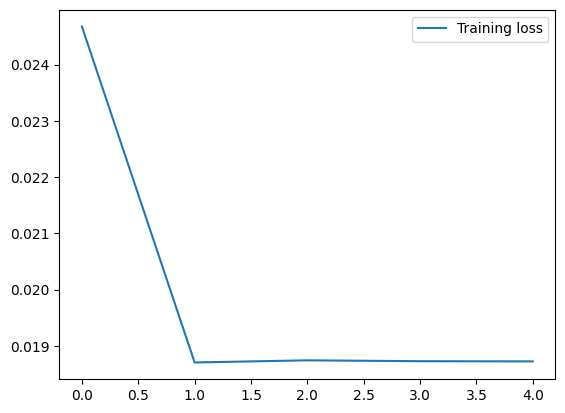

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])
history = model.fit(Xtrain, Ytrain, epochs=5, batch_size=200,verbose=2,callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training loss')
#plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Melakukan percobaan terhadap data test dengan data predict yang sebenarnya, apakah sudah bagus atau belum

In [ ]:
test_predictions = model.predict(Xtest).flatten()
predict = predict.flatten()
test_result = pd.DataFrame(data={'Test Prediction':test_predictions, 'Actuals':predict})
test_result

22/22 [==============================] - 0s 17ms/step


,Test Prediction,Actuals
0,0.382919,0.183576
1,0.382919,0.135420
2,0.382919,0.089286
3,0.382919,0.060322
4,0.382919,0.047901
...,...,...
691,0.382919,0.546073
692,0.382919,0.512040
693,0.382919,0.463063
694,0.382919,0.393934


<Axes: ylabel='Test Prediction'>

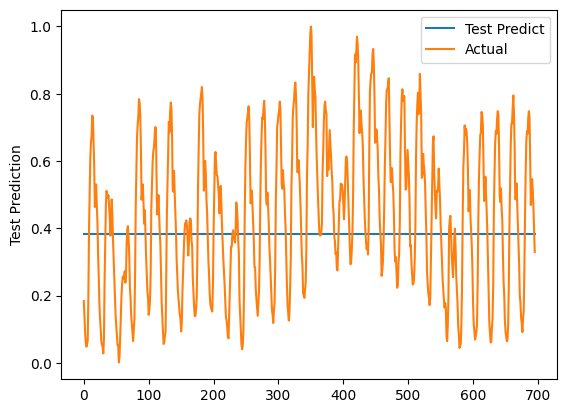

In [ ]:
sns.lineplot(test_result['Test Prediction'], label='Test Predict')
sns.lineplot(test_result['Actuals'], label='Actual')

In [ ]:
loss_note = min(history.history['loss'])
print(loss_note)

0.01870441436767578


# BIDIRECTIONAL LSTM

BIDiRECTIONAL LSTM

In [ ]:
bidir = Sequential()
bidir.add(Bidirectional(LSTM(64, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2]),return_sequences=True)))
bidir.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
bidir.add(Dropout(0.2))
bidir.add(Flatten())
bidir.add(Dense(64, activation='relu'))
bidir.add(Dense(8, activation='relu'))
bidir.add(Dense(Ytrain.shape[1]))

Epoch 1/5


219/219 - 87s - loss: 0.0065 - root_mean_squared_error: 0.0807 - 87s/epoch - 397ms/step
Epoch 2/5


219/219 - 81s - loss: 0.0024 - root_mean_squared_error: 0.0487 - 81s/epoch - 371ms/step
Epoch 3/5


219/219 - 81s - loss: 0.0017 - root_mean_squared_error: 0.0418 - 81s/epoch - 372ms/step
Epoch 4/5


219/219 - 81s - loss: 0.0014 - root_mean_squared_error: 0.0379 - 81s/epoch - 372ms/step
Epoch 5/5


219/219 - 79s - loss: 0.0012 - root_mean_squared_error: 0.0353 - 79s/epoch - 363ms/step


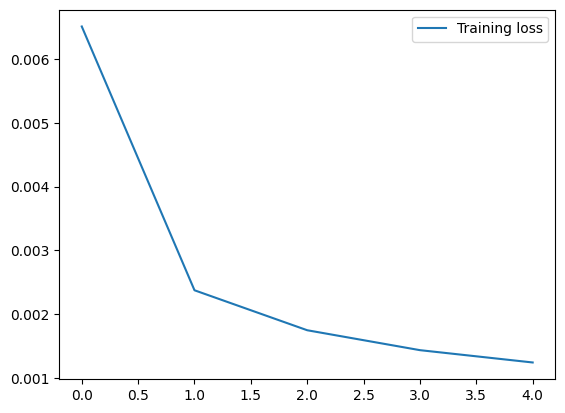

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
bidir.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])
history2 = bidir.fit(Xtrain, Ytrain, epochs=5, batch_size=200,verbose=2,callbacks=[early_stopping])

plt.plot(history2.history['loss'], label='Training loss')
#plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
loss_note = min(history2.history['loss'])
print(loss_note)

0.0012446562759578228


In [ ]:
bidir.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 48, 128)          62464     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 48, 64)           41216     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 48, 64)            0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                196672    
                                                                 
 dense_7 (Dense)             (None, 8)                

In [ ]:

test_predictions2 = bidir.predict(Xtest).flatten()
predict = predict.flatten()
test_result2 = pd.DataFrame(data={'Test Prediction':test_predictions2, 'Actuals':predict})
test_result2

22/22 [==============================] - 1s 27ms/step


,Test Prediction,Actuals
0,0.356510,0.183576
1,0.351272,0.135420
2,0.356548,0.089286
3,0.372275,0.060322
4,0.398614,0.047901
...,...,...
691,0.551085,0.546073
692,0.481520,0.512040
693,0.423735,0.463063
694,0.378795,0.393934


<Axes: ylabel='Test Prediction'>

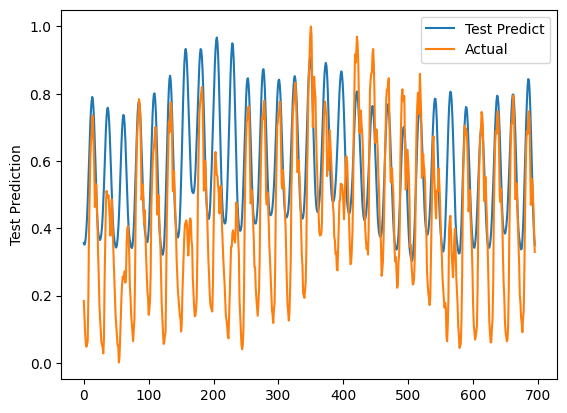

In [ ]:
sns.lineplot(test_result2['Test Prediction'], label='Test Predict')
sns.lineplot(test_result2['Actuals'], label='Actual')